In [59]:
%matplotlib inline
import numpy as np
csd_at = np.mgrid[0.:3.2:16j,                                                                                                                                                           
                  0.:3.2:16j]
csd_x, csd_y = csd_at

In [85]:
csd_y.shape

(16, 16)

In [61]:
from kcsd import csd_profile as CSD
CSD_PROFILE = CSD.gauss_2d_large
true_csd = CSD_PROFILE(csd_at, seed=13) 

In [62]:
CSD_PROFILE

<function kcsd.validation.csd_profile.gauss_2d_large(csd_at, seed=0)>

In [63]:
true_csd.shape

(16, 16)

In [89]:
true_csd

array([[-3.50133360e-02,  8.37612406e-03,  7.46264307e-02,
         1.20133816e-01,  1.25733901e-01,  1.02583008e-01,
         7.06351882e-02,  4.28093531e-02,  2.33109339e-02,
         1.15007084e-02,  5.15511936e-03,  2.10106066e-03,
         7.78785278e-04,  2.62550577e-04,  8.05094022e-05,
         2.24560560e-05],
       [-6.04376822e-01, -5.10683863e-01, -3.02399645e-01,
        -1.10869437e-01, -5.53515402e-03,  2.66781895e-02,
         2.51796078e-02,  1.59926390e-02,  8.47709463e-03,
         3.98993454e-03,  1.70197360e-03,  6.62416728e-04,
         2.35888624e-04,  7.69946839e-05,  2.30686112e-05,
         6.35136048e-06],
       [-8.94068148e-01, -7.72720570e-01, -5.11045799e-01,
        -2.75155877e-01, -1.37014587e-01, -7.33274508e-02,
        -4.36973759e-02, -2.66594107e-02, -1.53833572e-02,
        -8.09995549e-03, -3.84884909e-03, -1.64673732e-03,
        -6.34438370e-04, -2.20195574e-04, -6.88711543e-05,
        -1.94169151e-05],
       [-4.73026982e-01, -3.45649181e

<AxesSubplot:title={'center':'True CSD'}, xlabel='X (mm)', ylabel='Y (mm)'>

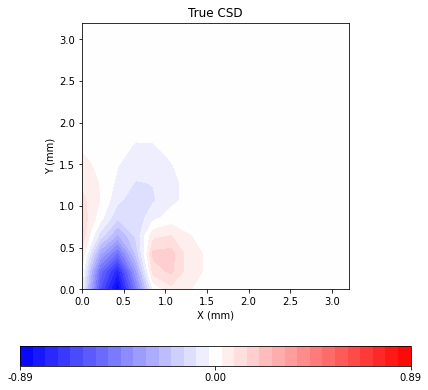

In [64]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm

def make_plot(xx, yy, zz, title='True CSD', cmap=cm.bwr):
    fig = plt.figure(figsize=(7, 7))
    ax = plt.subplot(111)
    ax.set_aspect('equal')
    t_max = np.max(np.abs(zz))
    levels = np.linspace(-1 * t_max, t_max, 32)
    im = ax.contourf(xx, yy, zz, levels=levels, cmap=cmap)
    ax.set_xlabel('X (mm)')
    ax.set_ylabel('Y (mm)')
    ax.set_title(title)
    ticks = np.linspace(-1 * t_max, t_max, 3, endpoint=True)
    plt.colorbar(im, orientation='horizontal', format='%.2f', ticks=ticks)
    return ax
make_plot(csd_x, csd_y, true_csd, title='True CSD', cmap=cm.bwr)

In [72]:
ele_x, ele_y = np.mgrid[0.00: 3.2: 16j,
                        0.00: 3.2: 16j]
ele_pos = np.vstack((ele_x.flatten(), ele_y.flatten())).T

In [88]:
true_csd

array([[-3.50133360e-02,  8.37612406e-03,  7.46264307e-02,
         1.20133816e-01,  1.25733901e-01,  1.02583008e-01,
         7.06351882e-02,  4.28093531e-02,  2.33109339e-02,
         1.15007084e-02,  5.15511936e-03,  2.10106066e-03,
         7.78785278e-04,  2.62550577e-04,  8.05094022e-05,
         2.24560560e-05],
       [-6.04376822e-01, -5.10683863e-01, -3.02399645e-01,
        -1.10869437e-01, -5.53515402e-03,  2.66781895e-02,
         2.51796078e-02,  1.59926390e-02,  8.47709463e-03,
         3.98993454e-03,  1.70197360e-03,  6.62416728e-04,
         2.35888624e-04,  7.69946839e-05,  2.30686112e-05,
         6.35136048e-06],
       [-8.94068148e-01, -7.72720570e-01, -5.11045799e-01,
        -2.75155877e-01, -1.37014587e-01, -7.33274508e-02,
        -4.36973759e-02, -2.66594107e-02, -1.53833572e-02,
        -8.09995549e-03, -3.84884909e-03, -1.64673732e-03,
        -6.34438370e-04, -2.20195574e-04, -6.88711543e-05,
        -1.94169151e-05],
       [-4.73026982e-01, -3.45649181e

In [74]:
from scipy.integrate import simps

def integrate_2d(csd_at, true_csd, ele_pos, h, csd_lims):
    csd_x, csd_y = csd_at
    xlin = csd_lims[0]                                                                                                                                                                                      
    ylin = csd_lims[1]                                                                                                                                                                                      
    Ny = ylin.shape[0]                                                                                                                                                                                      
    m = np.sqrt((ele_pos[0] - csd_x)**2 + (ele_pos[1] - csd_y)**2)                                                                                                           
    m[m < 0.0000001] = 0.0000001
    y = np.arcsinh(2 * h / m) * true_csd
    integral_1D = np.zeros(Ny)                                        
    for i in range(Ny):                                                  
        integral_1D[i] = simps(y[:, i], ylin)
    integral = simps(integral_1D, xlin)
    return integral

def forward_method(ele_pos, csd_at, true_csd):
    pots = np.zeros(ele_pos.shape[0])
    xlin = csd_at[0, :, 0]
    ylin = csd_at[1, 0, :]
    h = 50.  # distance between the electrode plane and the midslice
    sigma = 1.0 # S/m
    for ii in range(ele_pos.shape[0]):                                                                                                                                                                      
        pots[ii] = integrate_2d(csd_at, true_csd,                                                                                                                                                         
                                [ele_pos[ii][0], ele_pos[ii][1]], h,                                                                                                                                      
                                [xlin, ylin])
    pots /= 2 * np.pi * sigma
    return pots

pots = forward_method(ele_pos, csd_at, true_csd)

In [82]:
csd_at.shape

(2, 16, 16)

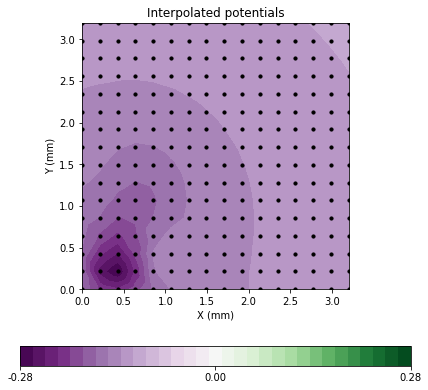

In [79]:


from scipy.interpolate import griddata

def grid(x, y, z):                                                                                                                                                                    
    x = x.flatten()                                                                                                                                                                                             
    y = y.flatten()                                                                                                                                                                                             
    z = z.flatten()                                                                                                                                                                                             
    xi, yi = np.mgrid[min(x):max(x):np.complex(0, 1000),                                                                                                                                                        
                      min(y):max(y):np.complex(0, 1000)]                                                                                                                                                        
    zi = griddata((x, y), z, (xi, yi), method='linear')                                                                                                                                                         
    return xi, yi, zi

pot_X, pot_Y, pot_Z = grid(ele_pos[:, 0], ele_pos[:, 1], pots)
ax = make_plot(pot_X, pot_Y, pot_Z, title='Interpolated potentials', cmap=cm.PRGn)
ax.scatter(ele_pos[:, 0], ele_pos[:, 1], 10, c='k')



In [81]:
pots.shape

(256,)